## 02. 영화정보 가지고 오기
 * https://movie.naver.com/movie/running/current.nhn

### HISTORY 
* 2019.08.31 댓글 가져올때 에러 해결.

### 2-1 URL로부터 정보를 가져오기
 * urllib.request의 urlopen을 이용 
 * requests를 이용

In [1]:
import requests as req
from urllib.request import urlopen
from bs4 import BeautifulSoup
import lxml

### HTML 정보를 가져오기
* 첫번째 방법 - urlopen(URL주소)
* 두번째 방법 - requests를 이용한 HTML 정보를 얻기.

In [2]:
url = "https://movie.naver.com/movie/running/current.nhn"
page = urlopen(url)
page
soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no" http-equiv="imagetoolbar"/>
<title>현재 상영영화 : 네이버 영화</title>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 현재상영작" property="me2:post_tag">
<meta content="네이버영화" property="me2:category1">
<meta content="현재상영작" property="me2:category2"/>
<meta content="현재상영작 : 네이버 영화" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/running/current.nhn" property="og:url"/>
<meta content="https://ssl.pstatic.net/static/m/movie/icons/OG_270_270.png" property="og:image"/>
<meta content="상영 중 영화의 예매율/평점/좋아요 순 정보 제공." property="og:description"/>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta content="h

In [3]:
url = "https://movie.naver.com/movie/running/current.nhn"
page = req.get(url)
html = page.content   # 가져온 정보에서 content (html) 정보만을 얻는다.
soup = BeautifulSoup(html, "lxml")
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no" http-equiv="imagetoolbar"/>
<title>현재 상영영화 : 네이버 영화</title>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 현재상영작" property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="현재상영작" property="me2:category2"/>
<meta content="현재상영작 : 네이버 영화" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/running/current.nhn" property="og:url"/>
<meta content="https://ssl.pstatic.net/static/m/movie/icons/OG_270_270.png" property="og:image"/>
<meta content="상영 중 영화의 예매율/평점/좋아요 순 정보 제공." property="og:description"/>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta content="

In [4]:
### 전체 내용 중에 해당되는 영역 얻기
body_p = soup.find('ul', class_='lst_detail_t1')
li_part = body_p.find_all('li')
li_part

[<li>
 <div class="thumb">
 <a href="/movie/bi/mi/basic.nhn?code=167605"><img alt="터미네이터: 다크 페이트" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191030_118/1572411669676j0Arb_JPEG/movie_image.jpg?type=m99_141_2"/></a><!-- N=a:nol.img,r:1,i:167605 -->
 </div>
 <dl class="lst_dsc">
 <dt class="tit">
 <span class="ico_rating_15">15세 관람가</span>
 <a href="/movie/bi/mi/basic.nhn?code=167605">터미네이터: 다크 페이트</a>
 <!-- N=a:nol.title,r:1,i:167605 -->
 </dt>
 <dd class="star">
 <dl class="info_star">
 <dt class="tit_t1">네티즌</dt>
 <dd>
 <div class="star_t1">
 <a href="/movie/bi/mi/point.nhn?code=167605#pointAfterTab"><span class="st_off"><span class="st_on" style="width:87.0%"></span></span><span class="num">8.70</span><span class="num2">참여 <em>3,981</em>명</span></a><!-- N=a:nol.urating -->
 </div>
 <span class="split">|</span>
 </dd>
 </dl>
 <dl class="info_exp">
 <dt class="tit_t1">예매율</dt>
 <dd>
 <div class="star_t1 b_st

In [5]:
for movies in li_part:
    title = movies.find('dt', class_ = 'tit').find('a')
    print(title.text)
    
    ## 평점
    info = movies.find('div', class_ = 'star_t1')
    score = info.find('span', class_ = 'num')
    print(score.text)
    
    # 참여인원
    # 상영시간
    # 개봉일자
    # 개요
    # 감독
    # 출연
    # 예매율

# 과제 2-1 : 하지 못한 부분에 대해 할 수 있는 부분까지 완성하기
# 과제 2-2 : pandas를 이용하여 csv 파일로 만들어보기

터미네이터: 다크 페이트
8.70
82년생 김지영
6.50
날씨의 아이
7.77
조커
8.67
말레피센트 2
7.64
가장 보통의 연애
7.92
빅 위시
6.44
빅 2: 황금열쇠 대소동
7.94
프렌드 존
8.54
람보 : 라스트 워
8.76
빅트립: 아기팬더 배달 대모험
7.82
경계선
8.27
벌새
8.92
더 킹: 헨리 5세
8.68
우먼 인 할리우드
8.67
메기
8.48
오늘도 위위
9.53
꼬마 자전거 스피디
7.50
퍼펙트맨
7.94
두번할까요
5.39
텔 잇 투 더 비즈
9.33
니나 내나
9.68
하이 라이프
8.00
100일 동안 100가지로 100퍼센트 행복찾기
8.86
엔젤 오브 마인
9.05
스노우 화이트
6.40
너를 만난 여름
8.07
오늘, 우리
9.36
와일드 로즈
8.65
시크릿 슈퍼스타
9.54
극장판 헬로카봇 : 달나라를 구해줘!
7.48
북간도의 십자가
7.53
버티고
6.58
원스 어폰 어 타임... 인 할리우드
7.64
쿠엔틴 타란티노 8
8.67
퍼펙트 스트레인저
8.21
체크 히어로
9.18
신문기자
7.95
터미네이터 2:오리지널
9.42
아워 바디
7.06
주전장
9.50
미드 90
8.32
판소리 복서
6.63
교회오빠
9.27
블러드 심플
8.07
열두 번째 용의자
7.46
아이언 자이언트
9.33
뷰티풀 보이
8.35
트루 시크릿
8.85
기생충
8.47
나의 노래는 멀리멀리
9.73
여배우들의 티타임
8.25
버스데이 원더랜드
7.75
나쁜 녀석들: 더 무비
6.46
여수 밤바다
7.15
제미니 맨
6.79
애월
8.38
엑시트
8.30
47미터 2
7.09
내가 사는 세상
7.96
리스본행 야간열차
8.30
장사리 : 잊혀진 영웅들
8.39
계절과 계절 사이
8.76
그린 북
9.61
기담
7.48
길은 멀어도 마음만은
9.17
김광석
8.68
김군
7.76
나의 특별한 형제
8.90
너의 이름은.
8.75
늙은 자전거
8.12
다이빙벨
6.38
델마와 루이스
8.94
디터 람스
9.33
런던 해즈 폴

### 2-2 영화 리뷰 정보 가져오기
* 스파이더맨: 뉴 유니버스 영화에 대해 가져오기

In [6]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [7]:
# url = 'https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after'
basic_url = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page="
# 2page 
# 3page
# 4page

In [8]:
comments = [ ]
cnt = 1
for i in range(1,50):
    url = basic_url + str(i)
    page = urlopen(url)
    soup = BeautifulSoup(page, "lxml")

    comment_all = soup.find_all('td', class_='title')
    for comment in comment_all:
        temp= list(comment.children)
        if len(temp) < 5:
            cnt= cnt + 1
            continue
        else:
            result = temp[4].strip()
            comments.append(result)
print(len(comments))
print(comments)
print(cnt)

480
['연출 연기 스토리 영상미 OST모두예술 그 자체였다.', '스토리가 재미있었다.', '이 영화 보실거면 좋은 스피커 쓰시고 큰 화면에 고화질로 보세요', '영상은 좋은데 재밌다는 느낌은 별로 없다.', '스파이더맨 시리즈 중 이게 제일 재밌었다.', '애니메이션만의 연출이나 영상미가 돋보였던 영화 파프롬홈보다 재밋는듯', '역대 최고의 스파이더맨', '올해 최고의 작품.', '진짜 명작이다 그냥 미쳤음', '영상 미학의 신세계 영접', '최고다 최고.. 말이 필요없다 ..', '내 인생 최고의 스파이더맨', '늘 알고 있던 스파이더맨과의 새로운 만남', '집에서 10번도 더돌려봄', '내 인생에서 제일 재밌는 스파이더맨 영화였다.', '파프롬 홈 보다 낫다', '진짜 미쳤음 ㅠㅠ 진짜 스파이더맨 실사영화 보다 재밌다.. 최고ㅠㅠ', '영상미는 좋았지만 스토리가..', '화려한 물감 그 속에 더 빛나는 영웅', '영상미’만’ 있음ㅋㅋ', '몇번을 봤는지 모르겠습니다.애니메이션에서만 가능한 연출과 적절한 ost에서 오는 감동정말 몇번봐도 질리지않는 최고의 영화입니다.', '소니가 드디어 해냈구나! 난 너희가 해낼 줄 알았...쿨럭.. 토비이후 너무 오래 기다렸잖아..ㅜ', '신선한 표현기법 이라해야하나 기존에 보지못했던 영상미를 느낄수있어서 좋았습니다. 내용도 볼만했는데 중간에 일본 캐릭터가 억지로 들어간느낌이라 갑자기 몰입감이 확떨어짐. 캐릭터하나가 영화를망침', '연출, 스토리, ost, 영상미 액션, 무엇도 빼놓을 수 없이 완벽하다. 만화에서만 가능한 연출들이 어울어져 이 영화를 수작으로 끌어 올리는데 한 몫하고 있다. 다만 킹핀과의 액션이 화려하지 못하고 삼촌이 프라울러였다는 설정이 다소 작위적으로 느껴졌다.', '어이없을정도로 좋고 기대를 잔뜩 가지고 봐도 좋다 그이상일테니', '빼놓을 것 없이 완벽히 좋았다. 역시 히어로물을 실사로 건드리는 것 보다도 애니매이션 그 자체가 더 완벽하다고 본다. 실사는 실사로 볼 수 있다는 경험적으로는 좋을지언

In [9]:
import pandas as pd

In [10]:
dict_doc = {"text" : comments}
doc = pd.DataFrame(dict_doc)

In [11]:
doc.to_csv("스파이더맨리뷰.csv", index = False)


#### (과제) 2-3 하나의 영화를 정해서 원하는 페이지까지 댓글 정보를 가지고 오기

### (Bonus Time) 텍스트마이닝 

In [12]:
#### local의 경우, 조금 복잡한 편.
#### konlp 불러오기 
#### 01. jdk 설치 
#### 02. pip install Jpypel-py3
#### 03. conda install -c conda-forge jpype1
#### 04. python 실행 
####   -- import nltk
####   -- nltk.download()
#### pip install wordcloud
#### pip install gensim

### colab의 경우
### pip install konlpy

In [13]:
from konlpy.tag import Kkma

In [14]:
kkma = Kkma()

### 꼬꼬마 모듈 사용
* 꼬꼬마 URL : http://kkma.snu.ac.kr/ 

In [ ]:
kkma.sentences("한국어 분석을 시작합니다. 화이팅!")

In [ ]:
kkma.pos('한국어 분석을 시작합니다. 화이팅!!!')

### 명사 분석

In [ ]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [20]:
hannanum.nouns('한국어 분석을 시작합니다. 파이썬은 재미있다.')

['한국어', '분석', '시작', '파이썬']

### 형태소 분석

In [21]:
hannanum.morphs("한국어 분석을 시작합니다. 파이썬은 재미있다.")

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '.', '파이썬', '은', '재미있', '다', '.']

In [22]:
hannanum.pos("한국어 분석을 시작합니다. 파이썬은 재미있다.")

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('.', 'S'),
 ('파이썬', 'N'),
 ('은', 'J'),
 ('재미있', 'P'),
 ('다', 'E'),
 ('.', 'S')]

### 워드 클라우드

In [23]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [24]:
f = open("스파이더맨리뷰.csv", encoding="utf-8")
#f = open("SpiderMan.txt", 'r', encoding='utf-8')
text = f.read()
f.close()

In [25]:
from matplotlib import rc
rc('font', family='NanumGothic')

(-0.5, 399.5, 199.5, -0.5)

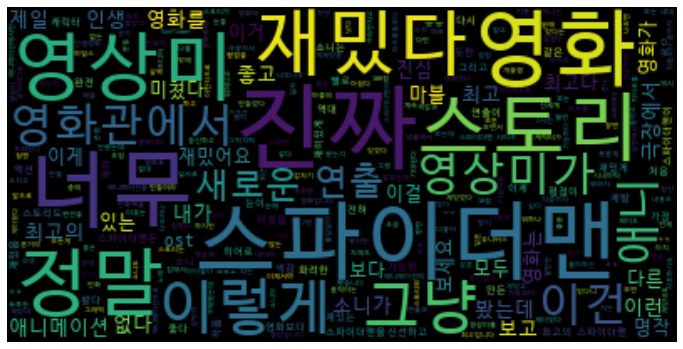

In [26]:
%matplotlib inline
from wordcloud import WordCloud
wcloud = WordCloud('./data/D2Coding.ttf', max_words=1000, relative_scaling = 0.2).generate(text)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

### REF
* konlpy 사이트 : https://konlpy-ko.readthedocs.io/ko/v0.4.3/
* 꼬꼬마 참고 : http://kkma.snu.ac.kr/